# Yelp Data Challenge - Clustering and PCA

BitTiger DS501

Nov 2017

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [4]:
from __future__ import unicode_literals
df = pd.read_csv('\\Users\\yxu\\Desktop\\files\\DOC_YXU\\11111\\Yelp\\last_2_years_restaurant_reviews.csv')

In [5]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2015-02-02,0,_Uwp6FO1X-avE9wqTMC59w,5,This place is first class in every way. Lobste...,0,-Z7Nw2UF7NiBSAzfXNA_XA


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [6]:
# Take the values of the column that contains review text data, save to a variable named "documents"

documents= df['text'].values



### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [7]:
# Make a column and take the values, save to a variable named "target"
df['perfect'] = df['stars'] > 4
target = df['perfect'].values


#### You may want to look at the statistic of the target variable

In [8]:
# To be implemented
target[:10]
target.mean()

0.4741461922405801

### Create training dataset and test dataset

In [9]:
from sklearn.cross_validation import train_test_split

C:\Users\yxu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
x_train, x_test, y_train, y_test = train_test_split(documents, target, test_size = .9, random_state=101)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=1000)

In [13]:
# Train the model with your training data
X_train_ndarrays = vectorizer.fit_transform(x_train).toarray()
X_train_tfidf_matrix = vectorizer.fit_transform(x_train).todense()

In [14]:
# Get the vocab of your tfidf
words=vectorizer.get_feature_names()

In [15]:
X_train_ndarrays.shape
#X_train_tfidf_matrix.shape

(64071, 1000)

In [16]:
# Use the trained model to transform all the reviews
X_ndarrays = vectorizer.transform(np.concatenate([x_train, x_test])).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [17]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_jobs = -1)

kmeans.fit(X_train_ndarrays)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [18]:
assigned_cluster = kmeans.predict(X_ndarrays)
assigned_cluster

array([0, 1, 0, ..., 0, 1, 0])

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [19]:
# To be implemented
print ("cluster centers:")
print (kmeans.cluster_centers_.shape)
#print("cluster centers: \n %s"%kmeans.cluster_centers_)

cluster centers:
(2, 1000)


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [20]:
# To be implemented
n_feat=10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" %(num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: good, food, place, just, like, time, ordered, service, order
1: great, food, service, place, amazing, good, love, friendly, best


#### Try different k
If you set k == to a different number, how does the top features change?

In [21]:
# To be implemented
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=6)
kmeans.fit(X_train_ndarrays)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
assigned_cluster = kmeans.predict(X_ndarrays)

In [23]:
n_feat=10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

In [24]:
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" %(num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: burger, fries, burgers, good, cheese, shake, food, place, great
1: pizza, good, crust, place, great, cheese, slice, order, best
2: food, order, just, time, service, like, minutes, came, got
3: great, food, service, place, amazing, good, friendly, staff, awesome
4: good, food, place, best, vegas, service, delicious, amazing, love
5: chicken, fried, good, rice, food, ordered, place, great, like


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [25]:
# To be implemented
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4, 5])

In [26]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X_ndarrays.shape[0])[assigned_cluster == i]
    sample_reviews = np.random.choice(cluster, 2, replace = False)
    print ("=" * 10)
    print ("Cluster %d:" % i) 
    for review_index in sample_reviews:
        print (" %s - " % df.ix[review_index]['stars']),
        print ("%s" %df.ix[review_index]['text'])
    print

Cluster 0:
 5 - 
Quality French Food!  If you like chicken, the coq au vin is very tasty and I would highly recommend it. This spot has great service, and a nice little bar area inside.
 5 - 
The sushi cupcakes are worth the drive down here. The General Managers customer service is over the top. If you come to the Linq you have to come here
Cluster 1:
 2 - 
Did you used to be a man?!  What I overheard at the bar.  Child present in the bar.  F-bombs flying by staff.  

Drinks with my favorite daughter with entertainment.
 5 - 
AYcE sushi in Vegas that has different daily specials!! That's awesome! And it's legitimate sushi pieces like halibut, Mackerels, yellowtail belly, salmon belly  to just name a few. That concept just sets this place a part from the other sushi places. 

Each sushi bite is small with small pieces of rice too so you won't have the urge to just hide the rice. Keep in mind they will charge u if you don't finish your food! Sitting at the bar they make the sushi much be

C:\Users\yxu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [27]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_restaurant = df['business_id'].value_counts().index[0]

In [28]:
df_top_restaurant = df[df['business_id'] == most_reviewed_restaurant].copy().reset_index()

In [29]:
df_top_restaurant

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect
0,283639,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-09-16,0,gkcPdbblTvZDMSwx8nVEKw,5,Got here early on football Sunday 7:30am as I ...,0,SKteB5rgDlkkUa1Zxe1N0Q,True
1,283640,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-09,0,mQfl6ci46mu0xaZrkRUhlA,5,"This buffet is amazing. Yes, it is expensive,...",0,f638AHA_GoHbyDB7VFMz7A,True
2,283641,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-02-08,0,lMarDJDg4-e_0YoJOKJoWA,2,This place....lol our server was nice. But fo...,0,A21zMqdN76ueLZFpmbue0Q,False
3,283642,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-12-22,0,30xmXTzJwHPcqt0uvSLQhQ,3,One star knocked off for the cold air conditio...,0,uNHEnP28MMmVy96ZSJKaMA,False
4,283643,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-02-21,0,g8ojbzP1xoX9dbDfQv2KJw,5,Miche better experience this time around. We w...,0,3cZPpN-IrA8CSc5PkZLbXA,True
5,283644,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-12-04,0,YUAMxrEKIvyjqqrmjzY_gA,5,Best buffet in Vegas We have ever been! It is ...,0,PnTSCTTvI1TKSmuv0omw4Q,True
6,283645,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2017-09-22,0,SOUuNn4f1fHKxFHntYzonw,3,Was torn between 2 and 3. Caught the last of ...,0,WvVqnHU_eVBUfL-CI9efdw,False
7,283646,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2016-12-14,0,1mAf8vTO6TGTrQ3WSfTB3g,4,This place was one of those once in a lifetime...,0,aYLS5lhdCp5HSPOtkMvapw,False
8,283647,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2015-08-13,0,T8dHL8iBqhNoAl6sT8QDaA,3,Food was delicious. Had a little something fo...,1,5OwYOdoQFrPkVG4QeoODFw,False
9,283648,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"Sandwiches, Buffets, Breakfast & Brunch, Food,...",4.0,0,2016-06-01,0,q0r0GrGs4D0JSwCA62138w,5,Waited about an hour in line. \nFeels like a m...,0,2dMTx3eEdNvw2o34V5pHew,True


We can also load restaurant profile information from the business dataset (optional)

In [30]:
# Load business dataset (optional)
import json 
import pandas as pd

file_business = 'C:\\Users\\yxu\\Desktop\\files\\DOC_YXU\\11111\\Yelp\\business.json'
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

# Take a look at the most reviewed restaurant's profile (optional)
#df_business.head()
df_business[df_business['business_id'] == most_reviewed_restaurant]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type


In [31]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['categories'].values

array([], dtype=object)

In [32]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['attributes'].values

array([], dtype=object)

### Vectorize the text feature

In [33]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

In [34]:
documents_top_restaurant.dtype, documents_top_restaurant.shape

(dtype('O'), (4923,))

In [35]:
documents_top_restaurant[:3]

array(["Got here early on football Sunday 7:30am as I wanted to start the day off right. Heard this was the best buffet in town besides Bally's hotel . So upon entering the buffet there was no line or wait. Hostess was nice giving us the once around tour because it was our 1st time. The food looked incredible and my mouth was salivating to try it all. I'm the type of person that my first go round is to try it phase then the next time , and the next time I Attack !! Steak and eggs were bomb , omelet was on hit too. Red velvet pancakes yum . Had problems with the country fried potatoes but the onion rings made up for it.                                             Not a big fan of the champagne and orange juice so I instead opted to order the bottomless beer  Yeee !! Sea food was incredible and made sure I did damaged there also. Made a pit stop for the food truck type tacos . Brought it home with the desserts ! Well rounded buffet really , really enjoyed it . Some yelpers I see complain

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [36]:
# To be implemented
df_top_restaurant['favorable'] = (df_top_restaurant['stars'] > 4)

target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([1, 1, 0, ..., 1, 0, 0])

In [37]:
#### Check the statistic of the target variable

In [38]:
# To be implemented
target_top_restaurant.mean()


0.38939670932358317

In [39]:
documents_top_restaurant.shape, target_top_restaurant.shape

((4923,), (4923,))

### Create training dataset and test dataset

In [40]:
from sklearn.cross_validation import train_test_split

In [41]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((64071,), (576647,), (64071,), (576647,))

### Get NLP representation of the documents

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [44]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(x_train).toarray()

In [45]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
vectors_train.shape

(64071, 1000)

In [46]:
# Use the trained model to transform the test data
vectors_test = vectorizer.transform(x_test).toarray()

In [47]:
# Use the trained model to transform all the data
vectors_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [48]:
# To be implemented
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [49]:
# To be implemented
assigned_cluster = kmeans.predict(vectors_documents_top_restaurant)

#### Inspect the centroids

In [50]:
# To be implemented
print ("cluster centers:")
print (kmeans.cluster_centers_.shape)

cluster centers:
(5, 1000)


#### Find the top 10 features for each cluster.

In [51]:
# To be implemented
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

In [52]:
print ("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print ("%d: %s" % (num, ", ".join(words[i] for i in centroid)))

top features for each cluster:
0: pizza, good, crust, place, great, cheese, slice, order, ordered
1: food, order, time, service, just, minutes, like, came, got
2: great, food, service, place, good, amazing, friendly, staff, atmosphere
3: good, chicken, food, ordered, really, like, burger, place, just
4: food, place, best, vegas, amazing, love, delicious, service, good


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [53]:
# To be implemented
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4])

In [54]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents_top_restaurant.shape[0])[assigned_cluster ==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print("=" * 10)
    print("Cluster %d:" % i )
    for review_index in sample_reviews:
        print (" %s -" % df_top_restaurant.ix[review_index]['stars'])
        print ("%s" % df_top_restaurant.ix[review_index]['text'])
    print


Cluster 0:
 2 -
I was so disappointed.. Don't believe all the hype. Chinese food is like panda, pizza is pizza, sushi is basic and the meat section is the same as any other cheaper buffets. Better avoid.
 4 -
Great Buffet. Very large with a huge variety of items. By far the best buffet on the strip. 

We came here with a long line. Fortunately for us my friend has a platinum card and we went to the front of the line. Even then we had to wait about 30 minutes for a table for 5 people.

Once inside, we went directly to the Asian food section where they have dim sum and Chinese food. There's 2 food and dessert sections here so make sure to look around for it. The dim sum was decent. 

Walk up a little more and there's pizza. I love pizza. Especially the pizza with truffle on it. The pizza here is decent as well. 

Then next was the American section with sausage, prime rib, bacon, etc. The prime rib was legit. Was super tender and perfectly medium rare. I wasn't too fond of the regular sau

C:\Users\yxu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [55]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(vectors_train)
x_test_scaled = scaler.transform(vectors_test)


### Use PCA to transform data (train and test) and get princial components

In [56]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50

# To be implemented
pca=PCA(n_components)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


In [57]:
x_train_pca.shape, x_test_pca.shape

((64071, 50), (576647, 50))

In [58]:
#inspect the principal axes in feature space
pca.components_.shape

(50, 1000)

### See how much (and how much percentage of) variance the principal components explain

In [59]:
# To be implemented
print (pca.explained_variance_[:10])

[5.49385406 4.44311129 3.31330844 2.8987239  2.7817406  2.68577824
 2.55977118 2.45318647 2.33568606 2.29077571]


In [60]:
# To be implemented
print (pca.explained_variance_ratio_[:10])

[0.00549377 0.00444304 0.00331326 0.00289868 0.0027817  0.00268574
 0.00255973 0.00245315 0.00233565 0.00229074]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0,0.5,'Variance Explained')

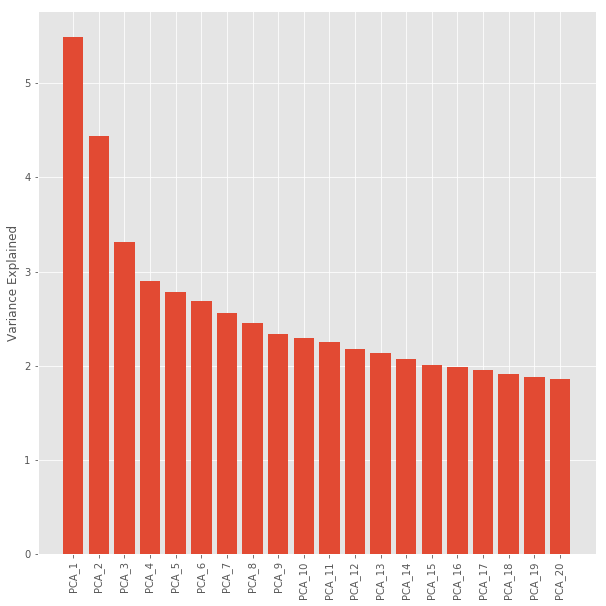

In [61]:
# To be implemented
n_col_to_display=20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10,10))
plt.bar(pca_range, pca.explained_variance_[:n_col_to_display], align='center')
xticks = plt.xticks(pca_range, pca_names, rotation=90)
plt.ylabel('Variance Explained')

Text(0.5,0,'Proportion of Variance Explained')

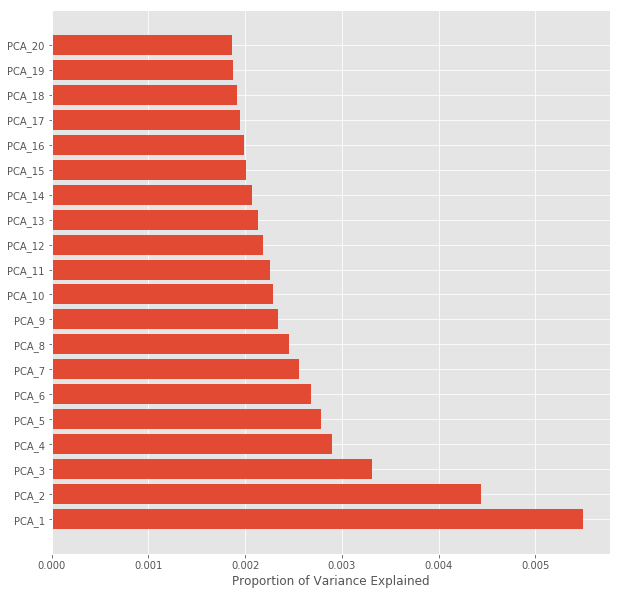

In [62]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize = (10,10))
plt.barh(pca_range, pca.explained_variance_ratio_[:n_col_to_display], align='center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')


## Classifying positive/negative review with PCA preprocessing

In [63]:
x_train_scaled.shape, y_train.shape

((64071, 1000), (64071,))

In [64]:
x_train_pca.shape, y_train.shape

((64071, 50), (64071,))

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [65]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
model_lrc = LogisticRegression()
model_lrc.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Get score for training set
model_lrc.score(x_train_scaled, y_train)

0.8246944795617362

In [67]:
# Get score for test set
model_lrc.score(x_test_scaled, y_test)

0.8160885255624325

#### Use (Stardardized + PCA) tf-idf vectors as features

In [68]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
model_lrc = LogisticRegression()
model_lrc.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
# Get score for training set
model_lrc.score(x_train_pca, y_train)

0.8004089213528741

In [70]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc.score(x_test_pca, y_test)

0.8007775987735998

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: (insert your comments here)

#### You can plot the coefficients against principal components


In [71]:
# To be implemented
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_lrc.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']
df_coeffs

,PCs,coeff
2,PC_3,0.425680
9,PC_10,0.402304
11,PC_12,0.144732
15,PC_16,0.124117
25,PC_26,0.082525
14,PC_15,0.080644
13,PC_14,0.057673
43,PC_44,0.052956
34,PC_35,0.051212
40,PC_41,0.040718


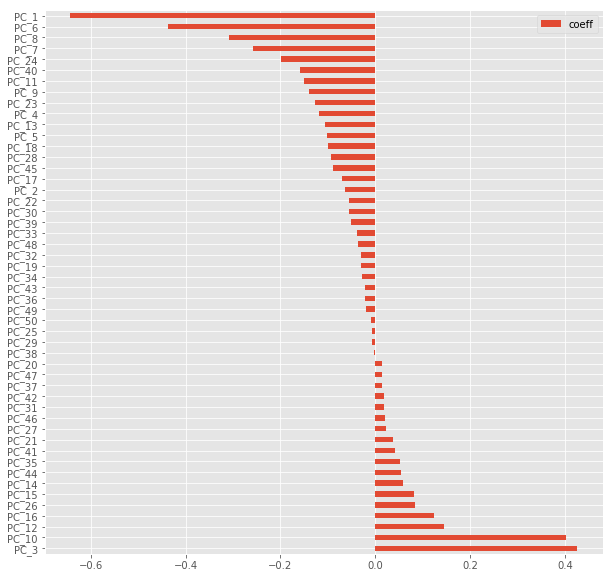

In [72]:
ax = df_coeffs.plot.barh(figsize=(10,10))
t=np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [73]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfc = RandomForestClassifier(max_depth=None, n_estimators = 20, min_samples_leaf=3, random_state=42)
model_rfc.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
# Get score for training set
model_rfc.score(x_train_scaled, y_train)

0.9255513414805451

In [76]:
# Get score for test set
model_rfc.score(x_test_scaled,y_test)

0.7880869925621741

#### Use (Stardardized + PCA) tf-idf vectors as features

In [77]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
model_rfx = RandomForestClassifier(max_depth = None, n_estimators=20, min_samples_leaf=3, random_state=42)
model_rfx.fit(x_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [81]:
# Get score for training set
model_rfc.score(x_train_pca, y_train)

ValueError: Number of features of the model must match the input. Model n_features is 1000 and input n_features is 50 

In [82]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rfc.score(x_test_pca, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 1000 and input n_features is 50 

#### Q: What do you see from the training result and the test result?

A: (insert your comments here)

#### You can plot the feature importances against principal components


In [83]:
# To be implemented
pca_range = np.arange(pca.n_components_)+1
pca_names = ['PC_%s' %i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_rfc.feature_importances_))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'feature importance']
df_coeffs

,PCs,feature importance
27,PC_28,0.044692
39,PC_40,0.008936
48,PC_49,0.003029
44,PC_45,0.001969
42,PC_43,0.001637
17,PC_18,0.001585
7,PC_8,0.001439
10,PC_11,0.001110
46,PC_47,0.001106
1,PC_2,0.000896


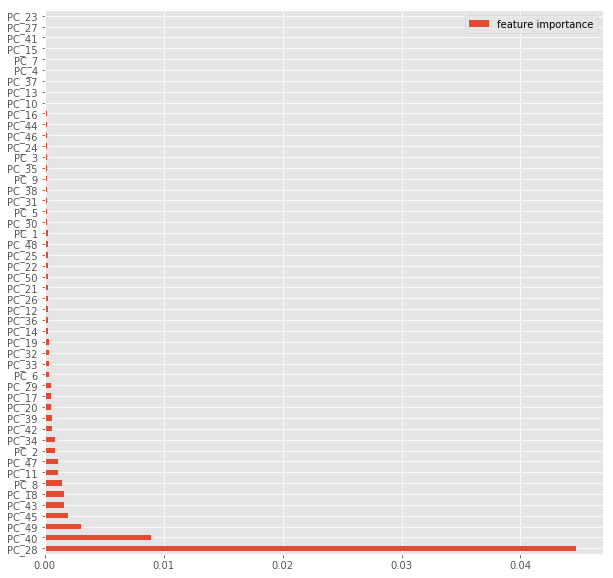

In [86]:
ax=df_coeffs.plot.barh(figsize=(10,10))
t=np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [ ]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented